<a href="https://colab.research.google.com/github/syedshameersarwar/deep_learning_c1/blob/master/DeepLearningC1W2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


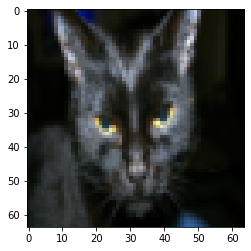

In [44]:
#Example of a picture

index = 25
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y[:,index]) + \
      ", it's a '" + \
      classes[np.squeeze(train_set_y[:,index])].decode("utf-8") \
      +"' picture.")

In [45]:
# Exercise: Find values for 
# - m_train(number of training examples)
# - m_test (number of test examples)
# - num_px (=height = width of a training image)

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("m_train = "+ str(m_train))
print("m_test = "+ str(m_test))
print("num_px = "+ str(num_px))

m_train = 209
m_test = 50
num_px = 64


In [46]:
# Exercise: Flatten the training and test data set into (num_px*num_px*,1) single vectors
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T # X matrix of slides
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [0]:
# standardizing dataset
# Standardization typically means rescales data to have a 
# mean of 0 and a standard deviation of 1 (unit variance)

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [0]:
# initializing parameters

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)

    """

    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b



In [49]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [0]:
from deeplearningc1w2ex import sigmoid_np

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    m = X.shape[1]

    z = np.dot(w.T, X) + b 
    A = sigmoid_np(z)
    
    J = - (np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m # cost

    dz = A-Y
    dw = np.dot(X, dz.T)/m
    db = np.sum(dz)/m

    grads = {"dw": dw,
             "db": db}
 
    return (grads,J)


In [51]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [0]:
def optimize(w, b, X , Y, num_iterations, learning_rate, print_cost = False):
    """
      This function optimizes w and b by running a gradient descent algorithm
      Arguments:
      w -- weights, a numpy array of size (num_px * num_px * 3, 1)
      b -- bias, a scalar
      X -- data of shape (num_px * num_px * 3, number of examples)
      Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
      num_iterations -- number of iterations of the optimization loop
      learning_rate -- learning rate of the gradient descent update rule
      print_cost -- True to print the loss every 100 steps
      Returns:
      params -- dictionary containing the weights w and bias b
      grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
      costs -- list of the costs at interval 100 computed during the optimization, this will be used to plot the learning curve.
      Tips:
      You basically need to write down two steps and iterate through them:
          1) Calculate the cost and the gradient for the current parameters. Use propagate().
          2) Update the parameters using gradient descent rule for w and b.
      """
    costs = []

    for i in range(num_iterations):
        (grads, cost) = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate*dw
        b -= learning_rate*db

        if i % 100 == 0:  
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))

    params = {"w":w, "b":b}
    grads = {"dw":dw , "db": db}
      
    return params, grads, costs



In [53]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0],1)

    A = sigmoid_np(np.dot(w.T, X) + b)

    Y_prediction = (A>0.5)*1

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [55]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1 0]]


In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 20000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    Returns:
    d -- dictionary containing information about the model.
    """

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, \
                                        num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train))*100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
      
    return d


In [57]:
d = model(train_set_x, train_set_y,  \
          test_set_x, test_set_y, num_iterations = 2000, \
          learning_rate = 0.005, \
          print_cost = True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993086
Cost after iteration 200: 0.46694904094655476
Cost after iteration 300: 0.3760068669480209
Cost after iteration 400: 0.33146328932825125
Cost after iteration 500: 0.30327306747438293
Cost after iteration 600: 0.27987958658260487
Cost after iteration 700: 0.2600421369258757
Cost after iteration 800: 0.2429406846779662
Cost after iteration 900: 0.2280042225672606
Cost after iteration 1000: 0.2148195137844964
Cost after iteration 1100: 0.20307819060644985
Cost after iteration 1200: 0.19254427716706862
Cost after iteration 1300: 0.18303333796883509
Cost after iteration 1400: 0.17439859438448874
Cost after iteration 1500: 0.1665213970540033
Cost after iteration 1600: 0.15930451829756612
Cost after iteration 1700: 0.15266732471296504
Cost after iteration 1800: 0.14654223503982342
Cost after iteration 1900: 0.1408720757031016
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "non-cat" picture.


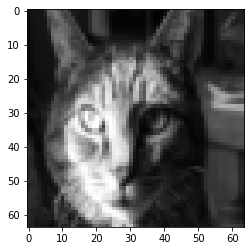

In [65]:
# Predictions
index = 30 # 0-49
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

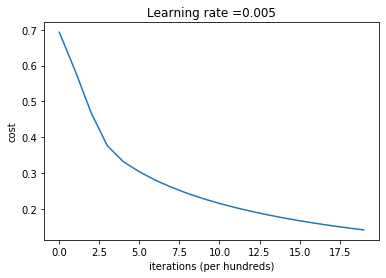

In [66]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 97.60765550239235 %
test accuracy: 70.0 %

-------------------------------------------------------



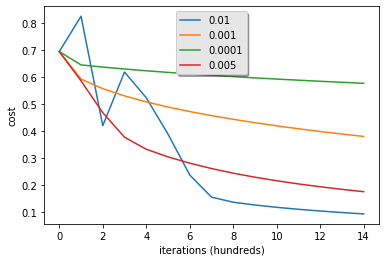

In [74]:
learning_rates = [0.01, 0.001, 0.0001, 0.005]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


y = 0, your algorithm predicts a "non-cat" picture.


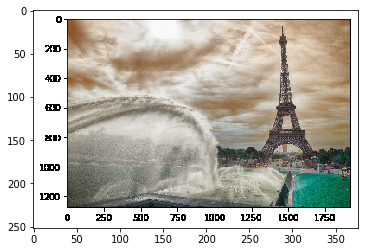

In [87]:
import cv2
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "test_image.png"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(cv2.imread(fname))
my_image = cv2.resize(image, dsize=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")